<a href="https://colab.research.google.com/github/novanerharianto45/novanderharianto/blob/main/Pemograman%20phton_Image%20Classification%20Pertemuan%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

'1101194154_NOVANDER HARIANTO_TUGAS INDUKSI MEDAN MAGNET-1(1).pdf'
 11170F05-21AA-4A71-97C9-B0AF31DA9987.png
 183679F0-BE9C-47D9-9783-F7A5C989DB5E.png
 2D8E2E31-E497-4924-A885-D26B557C126D.jpeg
 31AE09B9-B042-420E-96AE-80968E3A3F3C.png
 57A917D2-E4E3-4B4A-8195-7DBB22D6135B.png
 5D9A9CF7-2891-4CF6-86BC-B2780EF7B850.jpeg
 63375BEE-8111-41B4-9EBE-758F2D44B5AD.jpeg
'73_NOVANDER HARIANTO (1).pdf'
'73_NOVANDER HARIANTO.pdf'
 73_Novander harianto.pdf
 784E893D-0620-4AF6-B588-68325FD72574.jpeg
 7F71DECA-6184-4E24-992F-FED54FB3E7F3.jpeg
 9927321B-76B8-4691-BA67-8924C644205D.png
 Classroom/
'Colab Notebooks'/
'cover TP 2019.docx'
'cover TP 2019.gdoc'
 dataset/
 GMB_01@
 GMB_02@
 GMB_03@
 GMB_04@
 GMB_05@
 GMB_06@
 GMB_07@
 GMB_08@
'image (1).jpg'
'image (2).jpg'
'image (3).jpg'
'image (4).jpg'
'image (5).jpg'
'image (6).jpg'
 image.jpg
'img '/
'JURNAL RL_NOVANDER HARIANTO_1101194154_KELOMPOK 73 (1).pdf'
'JURNAL RL_NOVANDER HARIANTO_1101194154_KELOMPOK 73.pdf'
'Latihan quiziz kalkulus_20200504003

In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(441, 64, 64, 3)
(147, 64, 64, 3)


In [82]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               627300    
_________________________________________________________________
dense_13 (Dense)             (None, 5)               

In [83]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [84]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [85]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [86]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 20ms/step - loss: 1.5823 - accuracy: 0.3107 - val_loss: 1.4390 - val_accuracy: 0.5306
Epoch 2/25
14/14 [==============================] - 0s 7ms/step - loss: 1.3230 - accuracy: 0.4739 - val_loss: 1.2389 - val_accuracy: 0.4762
Epoch 3/25
14/14 [==============================] - 0s 7ms/step - loss: 1.1496 - accuracy: 0.5488 - val_loss: 1.0616 - val_accuracy: 0.6531
Epoch 4/25
14/14 [==============================] - 0s 7ms/step - loss: 0.9936 - accuracy: 0.6236 - val_loss: 0.9924 - val_accuracy: 0.6190
Epoch 5/25
14/14 [==============================] - 0s 7ms/step - loss: 0.8124 - accuracy: 0.7143 - val_loss: 0.8621 - val_accuracy: 0.6871
Epoch 6/25
14/14 [==============================] - 0s 7ms/step - loss: 0.7515 - accuracy: 0.7075 - val_loss: 0.8373 - val_accuracy: 0.7143
Epoch 7/25
14/14 [==============================] - 0s 7ms/step - loss: 0.6802 - accuracy: 0.7415 - val_loss: 0.7979 - val_accuracy: 0.7347
Epoch 8/25
14/14 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


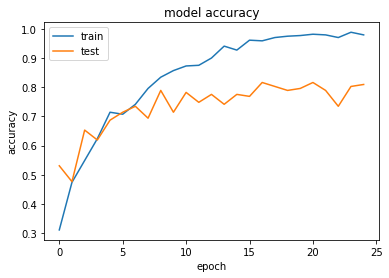

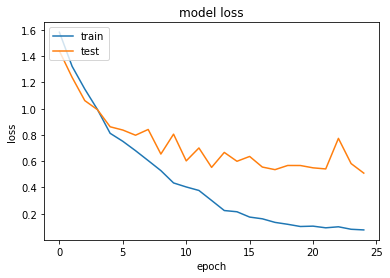

In [87]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [88]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.79      0.93      0.85        28
      GMB_03       0.96      0.77      0.85        30
      GMB_05       0.82      0.79      0.81        34
      GMB_06       0.81      0.81      0.81        27
      GMB_07       0.70      0.75      0.72        28

    accuracy                           0.81       147
   macro avg       0.82      0.81      0.81       147
weighted avg       0.82      0.81      0.81       147



In [89]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [90]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200815_203353.jpg'

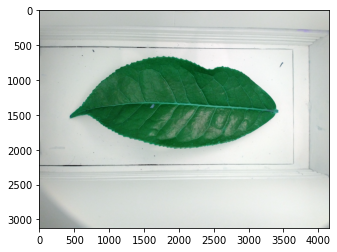

In [91]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [92]:
image_testing = Image.open('IMG_20200815_203353.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [93]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [94]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.38689286 0.2913593  0.32174784]]
['GMB_02']
